In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import datasets
from modeleval import RegressionEvaluator

import pandas as pd

In [2]:
# загрузка
X_train = pd.read_csv("data/from_kedro/train_x.csv")
y_train = pd.read_csv("data/from_kedro/train_y.csv", sep=';').dropna()['net_rate']
X_test = pd.read_csv("data/from_kedro/test_x.csv")
y_test = pd.read_csv("data/from_kedro/test_y.csv", sep=';').dropna()['net_rate']

In [7]:
# Простая модель
model = LinearRegression()
model.fit(X_train.head(1000), y_train.head(1000))

LinearRegression()

In [8]:
# выбор оценщика по регресии
eva = RegressionEvaluator()

Evaluation Result
---Common Metrics---
The mse is 2.5705
The mae is 0.7186
The rmse is 1.6033
The rmsle is 0.4916
The r-square is 0.0438


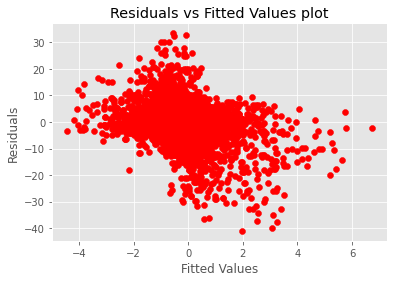

In [9]:
eva.evaluate(model, X_test, y_test, plot=True)

In [12]:
# ещё модель для сравнения
model2 = Lasso()
model2.fit(X_train.head(1000), y_train.head(1000))

Lasso()

Evaluation Result
---Common Metrics---
The mse is 2.6929
The mae is 0.6257
The rmse is 1.6410
The rmsle is 0.5435
The r-square is -0.0018


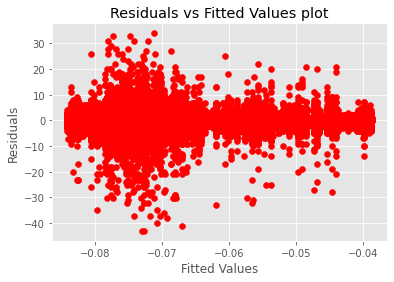

In [13]:
eva.evaluate(model2, X_test, y_test)

In [14]:
# найдем модель с наибольшим R2
bestmodel_r2 = eva.find_best_model([model, model2], X_test, y_test, "r2")

The model with maximum r-square (0.04378088715817674) is the 1 th model


In [15]:
# найдем модель с наименьшим RMSE
bestmodel_rmse = eva.find_best_model([model, model2], X_test, y_test, "rmse")

The model with minimum rmse (1.6032741551617318) is the 1 th model
